# **K-Means Algorithm**

K-Means is one of clustering algorithms that is commonly used to group particular data into some classes, clustering itself is categorized as unsupervised learning algorithm, it means that there is no previous data that has been labelled and there is no training process at the begninning when we creating the model. 

The steps of K-means algorithm is simply described below :

1.   Decide the number of cluster k that will be used to group the data
2.   Randomly choose center/centroid, the number of centroid that need to be chosen is based on the number of cluster you have decided in step 1
3.   Calculate the distances between all data to the all centroid 
4.   Assign the data to the cluster which they have nearest distance to the centroid
5.   Decide the new centroid by calculating the mean of each cluster
6.   Repeat the process from step 3 until there is no change in the centroid value or when the data remain at the same cluster (data is not moved to other clusters)

If there is more than one variable that will be used as a feature for clustering, to calculate the distance between data and centroid we can use euclidean distance formula (if you curious you can google it).



**Reference:**

https://ilmukomputer.org/wp-content/uploads/2018/05/agus-k-means-clustering.pdf

https://pythonprogramminglanguage.com/kmeans-clustering-centroid/

https://www.youtube.com/watch?v=4b5d3muPQmA&ab_channel=StatQuestwithJoshStarmer

# **K-Means Clustering Using Python**

In [ ]:
#import library 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#read Iris data
data = pd.read_csv("/content/Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
#select only the features from the data, here I will take SepalLength to Petalwidth as the features
knn_data = data.iloc[:,1:5]
knn_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
#get the value from the features in array format
features_value = knn_data.values
features_value

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [9]:
#finding the optimal number of k for clustering using elbow method

from sklearn.cluster import KMeans
inertia = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(features_value)
    inertia.append(km.inertia_)

In [23]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 

inertia = []
distortions = []
inertia1= {}
distortions1 = {}
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(features_value)
    inertia.append(km.inertia_)
    distortions.append(sum(np.min(cdist(features_value, km.cluster_centers_, 'euclidean'),axis=1)) / features_value.shape[0]) 
    inertia1[k] = km.inertia_
    distortions1[k] = sum(np.min(cdist(features_value, km.cluster_centers_, 'euclidean'),axis=1)) / features_value.shape[0]

In [24]:
for key, val in distortions1.items():
    print(f'{key} : {val}')

1 : 1.943034159037026
2 : 0.856027968244863
3 : 0.648839494895334
4 : 0.5581937771352218
5 : 0.5095854125481707
6 : 0.4661766694572026
7 : 0.4372158464586666
8 : 0.4133896757632562
9 : 0.3966895347860961
10 : 0.38036952427835174


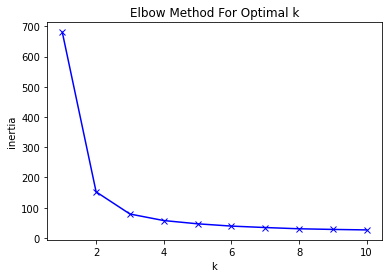

In [11]:
#Plotting the result to find the elbow
import matplotlib.pyplot as plt

plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

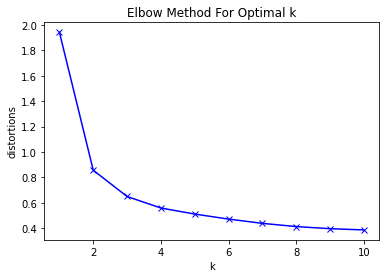

In [16]:
import matplotlib.pyplot as plt

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('distortions')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
pip install kneed

In [12]:
#finding the elbow using kneed locator
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), inertia, curve="convex", direction="decreasing")
kl.elbow

3

In [17]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), distortions, curve="convex", direction="decreasing")
kl.elbow

3

Using elbow method it can be found that the optimum number of cluster is 3

In [26]:
#finally we will apply the k-means clustering with k number = 3
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3, random_state=100)
kmeans.fit(features_value)
y_kmeans = kmeans.predict(features_value)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [27]:
#viewclustering result
knn_data['cluster'] = y_kmeans
knn_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [28]:
#find the centroid
centers = np.array(kmeans.cluster_centers_)
centers

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [32]:
centroid = pd.DataFrame(centers)
centroid

,0,1,2,3
0,6.850000,3.073684,5.742105,2.071053
1,5.006000,3.418000,1.464000,0.244000
2,5.901613,2.748387,4.393548,1.433871


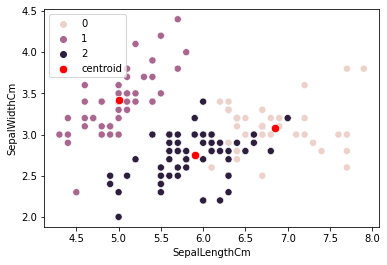

In [36]:
#last we will visualizing the clustering result using seaborn based on sepalwidth and sepalheight
import seaborn as sns
sns.scatterplot(x = knn_data.SepalLengthCm, y =knn_data.SepalWidthCm, s = 50, c = knn_data.cluster, marker = "o", hue = knn_data.cluster)
sns.scatterplot(x = centers[:,0], y = centers[:,1], marker="o", color='r', s = 70, label="centroid")